In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Extract

In [2]:
#Loading DataFrames
contato = pd.read_csv(r"contacts.tsv", sep = "\t", usecols=[' contactsId', 'contactsName'])
compania = pd.read_csv(r"companies.tsv", sep = "\t", usecols=[0, 1, 6, 7, 9])
venda = pd.read_csv(r"deals.tsv", sep = "\t")
setor = pd.read_csv(r"sectors.tsv", sep = "\t")

## Transform

In [3]:
#Modifing Columns Names;
contato.columns = ['contactsId', 'contactsName']
compania.columns = ['companiesId', 'companiesName', 'contactsId', 
                    'contactsName','sectorKey']

In [4]:
#Creating and Merging the Final DateFrame;
df_final = contato.copy()
df_final = df_final.merge(compania, on=['contactsId', 'contactsName'])
df_final = df_final.merge(venda, on=['contactsId', 'companiesId'])
print('Numero de linhas excluidas= ' + str(df_final.isnull().sum().sum()))
df_final.dropna(axis=0)
df_final.head(5)

Numero de linhas excluidas= 0


,contactsId,contactsName,companiesId,companiesName,sectorKey,dealsId,dealsDateCreated,dealsPrice
0,1,Damian Mathews,1,Class LLP,5,43,2/4/2019,660
1,1,Damian Mathews,1,Class LLP,5,28,5/9/2019,60
2,1,Damian Mathews,1,Class LLP,5,22,11/14/2017,4210
3,2,Paul Leblanc,2,Vulputate Corporation,3,88,4/8/2018,1740
4,3,Thomas Finléy,3,Sed Dui Fusce Consulting,6,83,6/26/2018,9590


In [5]:
#Transforming Dates and Sectors
from datetime import datetime

setores = []
dates = []
for item in df_final['dealsDateCreated']:
    item  = str(datetime.strptime(item, "%m/%d/%Y"))
    item2 = item[:7]
    dates.append(item2)
    
for i in df_final['sectorKey']:
    setores.append(setor['sector'][i-1])
    
df_final['dealsDateCreated'] = dates
df_final['sectorKey'] = setores

df_final.head(5)

,contactsId,contactsName,companiesId,companiesName,sectorKey,dealsId,dealsDateCreated,dealsPrice
0,1,Damian Mathews,1,Class LLP,Varejo,43,2019-02,660
1,1,Damian Mathews,1,Class LLP,Varejo,28,2019-05,60
2,1,Damian Mathews,1,Class LLP,Varejo,22,2017-11,4210
3,2,Paul Leblanc,2,Vulputate Corporation,Tecnologia,88,2018-04,1740
4,3,Thomas Finléy,3,Sed Dui Fusce Consulting,Atacado,83,2018-06,9590


## Output 1

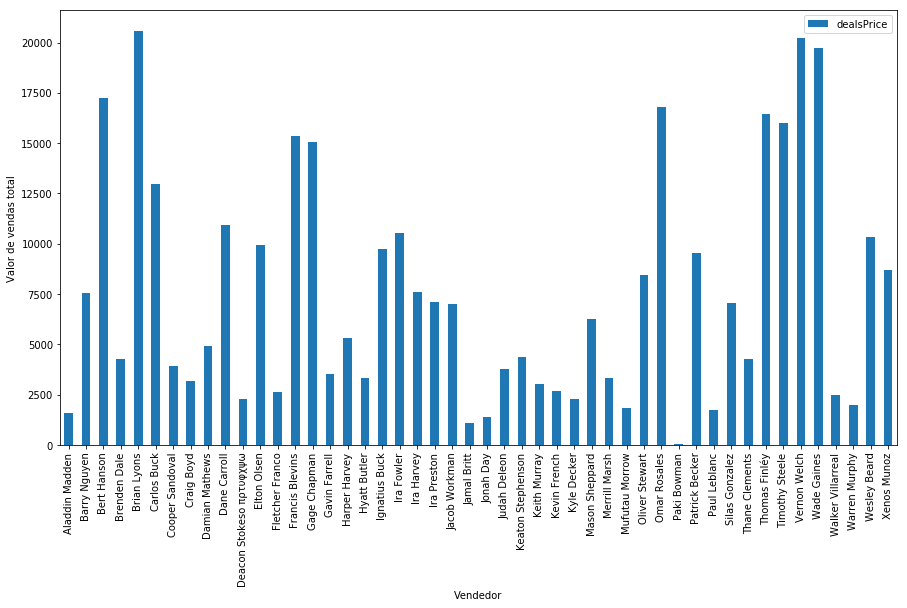

In [6]:
output1 = df_final[['contactsName', 'dealsPrice']]
output1 = output1.groupby(output1['contactsName']).sum()

#Plotting results 1;
fig, ax = plt.subplots(figsize=(15,8))
output1.plot(ax=ax, kind='bar')
plt.xlabel('Vendedor')
plt.ylabel('Valor de vendas total')
plt.savefig('graph_1.png')
plt.show()

C:\New folder\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\New folder\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


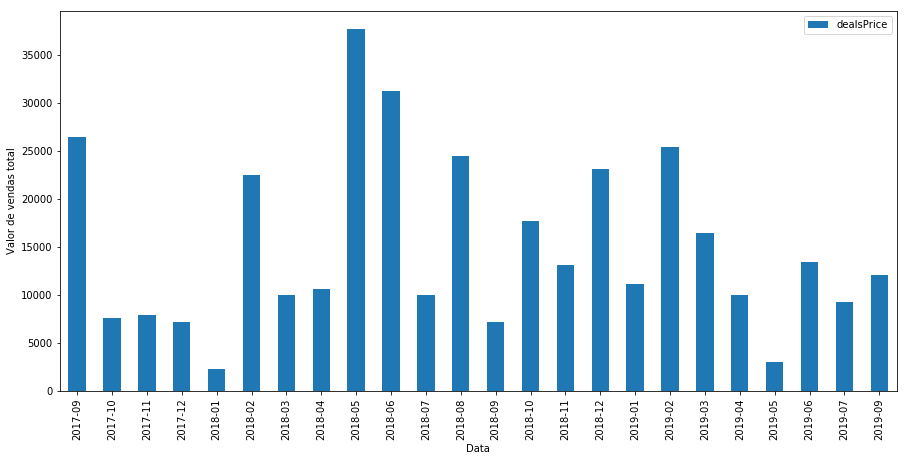

In [7]:
output2 = df_final[['dealsDateCreated', 'dealsPrice']]
output2['dealsDateCreated'] = pd.to_datetime(output2['dealsDateCreated'], format='%Y-%m').dt.strftime('%Y-%m')
output2.sort_values(['dealsDateCreated'], inplace=True)
output2 = output2.groupby(output2['dealsDateCreated']).sum()

#Plotting Result 2;
fig, ax = plt.subplots(figsize=(15,7))
output2.plot(ax=ax, kind='bar')
plt.xlabel('Data')
plt.ylabel('Valor de vendas total')
plt.savefig('graph_2.png')
plt.show()

## Output 2

In [8]:
#Output 3:
output3 = df_final.groupby(['companiesName', 'sectorKey']).agg({'dealsPrice': 'sum'})
output3 = output3.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

output3.to_csv('output_2.csv')